# Calculating Satellite Orbital Parameters from TLE's

In [92]:
from pyorbital import tlefile
from pyorbital.orbital import Orbital
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

In [15]:
#1. coordinates at time of measurement TODAY 1/11/22
dtobj = datetime(2023,1,11,13,48,26)
snpp = Orbital('Suomi NPP', tle_file='./tle/suomi_2023_01_11.txt')
print(dtobj)
true_params = snpp.get_lonlatalt(dtobj)
print(true_params)

2023-01-11 13:48:26
(175.4820138692113, 6.360993568898433, 829.2997832966139)


In [26]:
#2. coordinates extrapolated from 1/04/23
snpp = Orbital('Suomi NPP', tle_file='./tle/suomi_2023_01_04.txt')
params_1 = snpp.get_lonlatalt(dtobj)
print(params_1)
#print('Errors:', true_params - params_1)
print(params_1[0])

(175.48226840008442, 6.373364478927095, 829.5917941286438)
175.48226840008442


In [17]:
#3. coordinates extrapolated from 11/30/22
snpp = Orbital('Suomi NPP', tle_file='./tle/suomi_2022_11_30.txt')
params_2 = snpp.get_lonlatalt(dtobj)
print(params_2)

(174.56238693088608, 0.5123240648778071, 830.3200312464311)


In [18]:
#4. coordinates extrapolated from 11/23/22
snpp = Orbital('Suomi NPP', tle_file='./tle/suomi_2022_11_23.txt')
params_3 = snpp.get_lonlatalt(dtobj)
print(params_3)

(174.5885721933231, 0.7415616197606859, 830.1054405974934)


In [19]:
#5. coordinates extrapolated from 11/16/22
snpp = Orbital('Suomi NPP', tle_file='./tle/suomi_2022_11_16.txt')
params_4 = snpp.get_lonlatalt(dtobj)
print(params_4)

(174.50870589637972, 0.2756554895045311, 829.8857692322509)


In [20]:
#6. coordinates extrapolated from 10/16/22
snpp = Orbital('Suomi NPP', tle_file='./tle/suomi_2022_10_16.txt')
params_5 = snpp.get_lonlatalt(dtobj)
print(params_5)

(174.36465796735263, -0.2996211995832042, 828.9962332061691)


In [21]:
#7. coordinates extrapolated from 08/16/22
snpp = Orbital('Suomi NPP', tle_file='./tle/suomi_2022_08_16.txt')
params_6 = snpp.get_lonlatalt(dtobj)
print(params_6)

(174.78877827343027, 3.1988346803522796, 830.2218513028458)


In [22]:
#8. coordinates extrapolated from 04/16/22
snpp = Orbital('Suomi NPP', tle_file='./tle/suomi_2022_04_16.txt')
params_7 = snpp.get_lonlatalt(dtobj)
print(params_7)

(168.7066187926549, -31.837724160052847, 839.4704229182945)


In [23]:
#9. coordinates extrapolated from 01/11/21
snpp = Orbital('Suomi NPP', tle_file='./tle/suomi_2021_01_11.txt')
params_8 = snpp.get_lonlatalt(dtobj)
print(params_8)

(109.71278033709162, -80.34591094367694, 855.5282968746142)


In [54]:
df = pd.DataFrame({'Truth' : true_params, '1 Week Ago': params_1, '2 Weeks Ago' : params_2, '3 Weeks Ago' : params_3, '4 Weeks Ago' : params_4, '2 Months Ago' : params_5, '4 Months Ago' : params_6, '8 Months Ago' : params_7, '2 Years Ago' : params_8})
df.index = ['Latitude', 'Longitude', 'Altitude']
df.transpose()

,Latitude,Longitude,Altitude
Truth,175.482014,6.360994,829.299783
1 Week Ago,175.482268,6.373364,829.591794
2 Weeks Ago,174.562387,0.512324,830.320031
3 Weeks Ago,174.588572,0.741562,830.105441
4 Weeks Ago,174.508706,0.275655,829.885769
2 Months Ago,174.364658,-0.299621,828.996233
4 Months Ago,174.788778,3.198835,830.221851
8 Months Ago,168.706619,-31.837724,839.470423
2 Years Ago,109.712780,-80.345911,855.528297


In [84]:
errors = df.copy()
list = ['1 Week Ago', '2 Weeks Ago', '3 Weeks Ago', '4 Weeks Ago', '2 Months Ago', '4 Months Ago', '8 Months Ago', '2 Years Ago']
for i in list:
    errors[i] = (errors['Truth'] - errors[i]) /errors['Truth'] * 100
errors.drop(['Truth'], axis = 1, inplace = True)
errors = errors.transpose()
errors.rename(columns = ({'Latitude':'Latitude % Error', 'Longitude':'Longitude % Error', 'Altitude':'Altitude % Error'}), inplace = True)
errors

,Latitude % Error,Longitude % Error,Altitude % Error
1 Week Ago,-0.000145,-0.194481,-0.035212
2 Weeks Ago,0.524058,91.945848,-0.123025
3 Weeks Ago,0.509136,88.342047,-0.097149
4 Weeks Ago,0.554648,95.666471,-0.070660
2 Months Ago,0.636735,104.710289,0.036603
4 Months Ago,0.395047,49.711713,-0.111186
8 Months Ago,3.861020,600.514956,-1.226413
2 Years Ago,37.479188,1363.103163,-3.162730


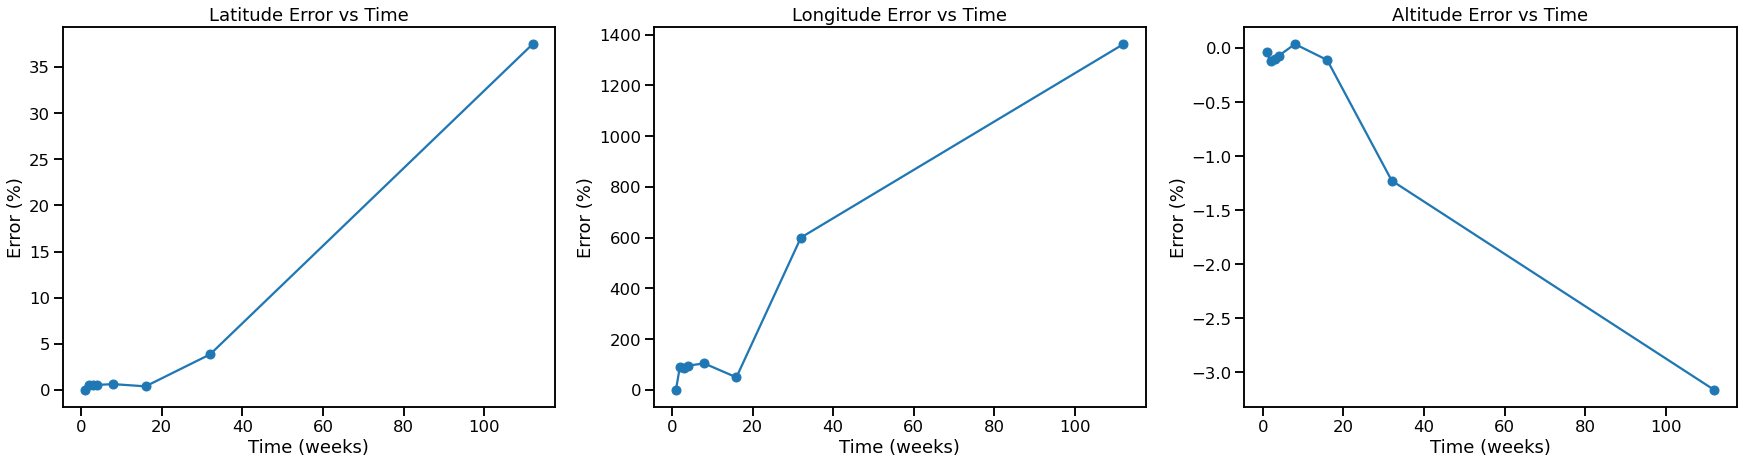

In [93]:
fig, axs = plt.subplots(1,3, figsize=(30, 7))
fig.patch.set_facecolor('white')

x = [1,2,3,4,8,16,32,112]

axs[0].plot(x, errors['Latitude % Error'], marker = 'o')
axs[0].set_title('Latitude Error vs Time');
axs[0].set_xlabel('Time (weeks)');
axs[0].set_ylabel('Error (%)');

axs[1].plot(x, errors['Longitude % Error'], marker = 'o')
axs[1].set_title('Longitude Error vs Time');
axs[1].set_xlabel('Time (weeks)');
axs[1].set_ylabel('Error (%)');

axs[2].plot(x, errors['Altitude % Error'], marker = 'o')
axs[2].set_title('Altitude Error vs Time');
axs[2].set_xlabel('Time (weeks)');
axs[2].set_ylabel('Error (%)');